## Statistical and Machine Learning, Fall 2024

### Week 6: Logistic Regression and Loss Function Derivation for Classification Problems 		

### Instructor: Farhad Pourkamali 

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/farhad-pourkamali/MATH6388Online/blob/main/Week6.ipynb)



### Overview 
<hr style="border:2px solid gray">

* Logistic regression is used for classification problems where the goal is to predict the probability of a binary outcome (e.g., success/failure)

* Logistic regression involves a probabilistic model of the form $p(y|\mathbf{x};\boldsymbol{\theta})$, where $\mathbf{x}\in\mathbb{R}^D$ is a fixed-dimensional input vector 
    * $C=2$: binary logistic regression $\rightarrow y\in\{0,1\}$ 
    * $C>2$: multinomial/multiclass logistic regression $\rightarrow y\in\{1,2,\ldots,C\}$
    
* The Bernoulli distribution is a discrete probability distribution representing the outcome of a single binary experiment, where the result is either a success (1) with probability $\theta$ or a failure (0) with probability $1-\theta$.
    
* Thus, the probability mass function (PMF) of a Bernoulli distribution is:
$$Ber(y|\theta)=\begin{cases}\theta &\text{ if } y=1\\1-\theta &\text{ if } y=0\end{cases}=\theta^y(1-\theta)^{1-y}$$

* Binary logistic regression

$$p(y|\mathbf{x};\boldsymbol{\theta})=Ber(y|\color{red}{\sigma(f(\mathbf{x};\boldsymbol{\theta}))})$$

where the sigmoid or logistic function is defined as $\sigma(a):=\frac{1}{1+\exp(-a)}$

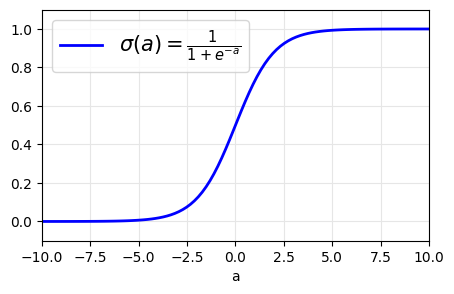

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

a = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-a))

plt.figure(figsize=(5, 3))
plt.plot(a, sig, "b-", linewidth=2, label=r"$\sigma(a) = \frac{1}{1 + e^{-a}}$")
plt.xlabel("a")
plt.legend(loc="upper left", fontsize=15)
plt.axis([-10, 10, -0.1, 1.1])
plt.grid(color='0.9')
plt.show()

### Properties of sigmoid function
<hr style="border:2px solid gray">

* The derivative of $\sigma(a)$ has a nice form

$$\begin{align}\sigma(a)&=\frac{1}{1+e^{-a}}=(1+e^{-a})^{-1}\\
\frac{d}{da}\sigma(a)&=(-1)(1+e^{-a})^{-2}(1+e^{-a})'\\
\frac{d}{da}\sigma(a)&=(-1)(1+e^{-a})^{-2}(-e^{-a})\\
\frac{d}{da}\sigma(a)&=\frac{1}{1+e^{-a}}\frac{e^{-a}}{1+e^{-a}}=\sigma(a)(1-\sigma(a))
\end{align}$$


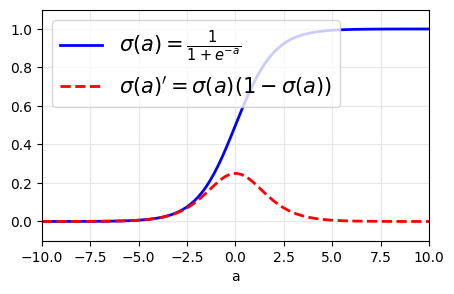

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 

a = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-a))

plt.figure(figsize=(5, 3))
plt.plot(a, sig, "b-", linewidth=2, label=r"$\sigma(a) = \frac{1}{1 + e^{-a}}$")
plt.plot(a, sig*(1-sig), "r--", linewidth=2, label=r"$\sigma(a)'=\sigma(a)(1-\sigma(a))$")
plt.xlabel("a")
plt.legend(loc="upper left", fontsize=15)
plt.axis([-10, 10, -0.1, 1.1])
plt.grid(color='0.9')
plt.show()

### Back to binary classification
<hr style="border:2px solid gray">

* Plugging the definition of the sigmoid function

$$p(y=1|\mathbf{x};\boldsymbol{\theta})=\sigma(a)=\frac{1}{1+e^{-a}}=\frac{e^a}{1+e^a}$$
$$p(y=0|\mathbf{x};\boldsymbol{\theta})=1-\sigma(a)=\frac{e^{-a}}{1+e^{-a}}=\frac{1}{1+e^a}$$

* The quantity $a$ is known as the log-odds or logit

$$\log\Big(\frac{p(y=1|\mathbf{x};\boldsymbol{\theta})}{p(y=0|\mathbf{x};\boldsymbol{\theta})}\Big)=\log\Big(e^a\Big)=a$$

* The inverse of the sigmoid function is called the *logit function*

$$\sigma^{-1}(p)=\log\big(\frac{p}{1-p}\big):=\text{logit}(p)$$

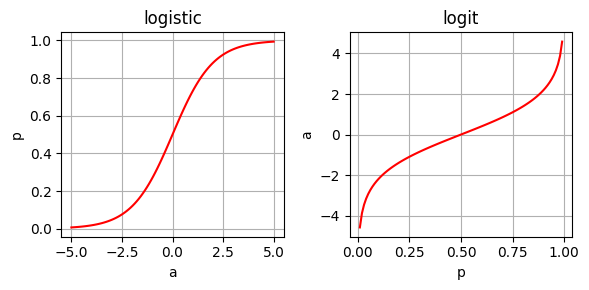

In [3]:
import numpy as np
from scipy.special import expit, logit
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2, figsize=(6,3))

# expit 
x = np.linspace(-5, 5, 100)
ax[0].plot(x, expit(x), 'r')
ax[0].set_xlabel('a')
ax[0].set_ylabel('p')
ax[0].grid()
ax[0].set_title('logistic')

# logit 
x = np.linspace(0, 1, 100)
ax[1].plot(x, logit(x), 'r')
ax[1].set_xlabel('p')
ax[1].set_ylabel('a')
ax[1].grid()
ax[1].set_title('logit')

plt.tight_layout()
plt.show()

### Linear model for binary logistic regression
<hr style="border:2px solid gray">

* Use a linear function of the form $f(\mathbf{x};\mathbf{w})=\mathbf{w}^T\mathbf{x}$, yielding the following pmf

$$p(y|\mathbf{x};\mathbf{w})=Ber(y|\sigma(\mathbf{w}^T\mathbf{x}))$$

* Thus, we get 

$$p(y=1|\mathbf{x};\mathbf{w})=\sigma(\mathbf{w}^T\mathbf{x})=\frac{1}{1+\exp(-\mathbf{w}^T\mathbf{x})}$$




<img src="
https://github.com/farhad-pourkamali/MATH6388/blob/main/images/ml_general.png?raw=true" width=700>

### Building loss function with the likelihood approach
<hr style="border:2px solid gray">

* The negative log likelihood (scaled by the dataset size N) is given by 
 * For simplicity: $\mu_n=\sigma(a_n)$
 
 $$\begin{align}\text{NLL}(\mathbf{w})&=-\frac{1}{N}\sum_{n=1}^N\log Ber(y_n|\mu_n) \\ &=-\frac{1}{N}\sum_{n=1}^N\log\big[\mu_n^{y_n}(1-\mu_n)^{1-y_n}\big]\\&=-\frac{1}{N}\sum_{n=1}^N\big[y_n\log \mu_n + (1-y_n)\log(1-\mu_n)\big]\\&=\frac{1}{N}\sum_{n=1}^N\text{H}_{ce}(y_n,\mu_n)\end{align}$$
 

### Understanding the loss function
<hr style="border:2px solid gray">

$$\text{H}_{ce}(y_n,\mu_n)=\begin{cases}-\log(\mu_n) & \text{ if } y_n=1 \\ -\log(1-\mu_n) &\text{ if } y_n=0\end{cases}$$


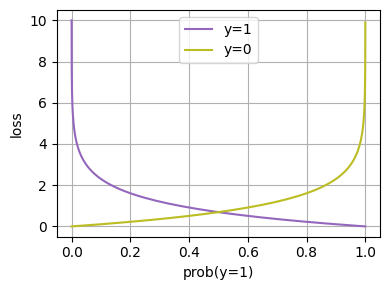

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.special import expit

def cross_entropy_loss(y, mu):
    if y == 1:
        return -np.log(mu)
    else:
        return -np.log(1 - mu)

z = np.arange(-10, 10, 0.1)
mu_z = expit(z)

cost_1 = cross_entropy_loss(1, mu_z) # when y = 1
cost_0 = cross_entropy_loss(0, mu_z) # when y = 0 

fig, ax = plt.subplots(figsize=(4,3))
plt.plot(mu_z, cost_1, 'C4-', label='y=1')
plt.plot(mu_z, cost_0, 'C8-', label='y=0')
plt.xlabel('prob(y=1)')
plt.ylabel('loss')
plt.tight_layout()
plt.legend()
plt.grid()
plt.show()

### Deriving the gradient - part 1
<hr style="border:2px solid gray">

* Let us start with computing $\nabla_{\mathbf{w}} \log \mu_n$, where $\mu_n=\sigma(a_n)$ and $a_n=\mathbf{w}^T\mathbf{x}_n$
 * Find the partial derivative wrt $w_k$
 
 $$\begin{align}\frac{\partial}{\partial w_k}\mu_n&=\frac{\partial}{\partial a_n}\sigma(a_n)\frac{\partial}{\partial w_k}a_n\\&=\sigma(a_n)(1-\sigma(a_n))x_{n,k}=\mu_n(1-\mu_n)x_{n,k}\end{align}$$
 
 * Hence
 $$\nabla_{\mathbf{w}} \mu_n=\mu_n(1-\mu_n)\mathbf{x}_n $$
 
 * As a result
 $$\nabla_{\mathbf{w}}\log\mu_n=\frac{1}{\mu_n}\nabla_{\mathbf{w}}\mu_n=(1-\mu_n)\mathbf{x}_n$$



### Deriving the gradient - part 2
<hr style="border:2px solid gray">

* Gradient of the second term 

$$\nabla_{\mathbf{w}} \log(1-\mu_n)=\frac{1}{1-\mu_n}\nabla_{\mathbf{w}}(1-\mu_n)=\frac{-1}{1-\mu_n}\nabla_{\mathbf{w}}\mu_n=-\mu_n\mathbf{x}_n$$

* Gradient of NLL

$$\begin{align}\nabla_{\mathbf{w}}\text{NLL}(\mathbf{w})&=-\frac{1}{N}\sum_{n=1}^N\big[y_n\nabla_{\mathbf{w}}\log\mu_n+(1-y_n)\nabla_{\mathbf{w}}\log(1-\mu_n)\big]\\&=-\frac{1}{N}\sum_{n=1}^N [y_n\mathbf{x}_n-\mu_n\mathbf{x}_n]=\frac{1}{N}\sum_{n=1}^N(\mu_n-y_n)\mathbf{x}_n\end{align}$$

* Compact form with the data matrix $\mathbf{X}\in\mathbb{R}^{N\times D}$ and the response vector $\mathbf{y}\in\mathbb{R}^{N\times 1}$

$$\nabla_{\mathbf{w}}\text{NLL}(\mathbf{w})=\frac{1}{N}\mathbf{X}^T\big(\sigma(\mathbf{X\mathbf{w}})-\mathbf{y}\big)$$





### Stochastic gradient descent (SGD)
<hr style="border:2px solid gray">

* If we use a minibatch of size 1, then we get the following simple update equation 

$$\mathbf{w}_{t+1}=\mathbf{w}_t-\eta_t\nabla_{\mathbf{w}} \text{NLL}(\mathbf{w}_t)$$

$$\mathbf{w}_{t+1}=\mathbf{w}_t-\eta_t\big(\sigma(\mathbf{w}_t^T\mathbf{x}_n)-y_n\big)\mathbf{x}_n$$

where the average is replaced with a single randomly chosen data point $(\mathbf{x}_n,y_n)$ 

### Multinomial logistic regression
<hr style="border:2px solid gray">

* To represent a distribution over a finite set of labels, $y\in\{1,\ldots,C\}$, we can use the categorical distribution, which generalizes the Bernoulli to $C>2$ values

$$\text{Cat}(y|\boldsymbol{\theta})=\prod_{c=1}^C\theta_c^{I(y=c)}$$

where $\boldsymbol{\theta}=[\theta_1,\ldots,\theta_C]$, $0\leq \theta_c\leq 1$, and $\sum_{c=1}^C\theta_c=1$

* A classification model of the following form 

$$\begin{align}p(y|\mathbf{x};\boldsymbol{\theta})&=\text{Cat}\big(y|f(\mathbf{x};\boldsymbol{\theta})\big)\\&= \text{Cat}\big(y|\text{softmax}(\mathbf{W}\mathbf{x})\big)\end{align}$$

where $\mathbf{W}\in\mathbb{R}^{C\times D}$

* Let $\mathbf{a}=\mathbf{W}\mathbf{x}\in\mathbb{R}^C$ be the vector of logits

$$p(y=c|\mathbf{x};\boldsymbol{\theta})=\frac{e^{a_c}}{\sum_{c'=1}^Ce^{a_{c'}}}$$

* Thus, $a_c$ is the logit (the raw score or unnormalized output) for class $c$

* The cross-entropy loss function for one sample $(\mathbf{x}, y)$ can be written as:

$$\text{loss} = - \sum_{c=1}^{C} \tilde{y}_{c} \log\Big( p(y = c \mid \mathbf{x}; \boldsymbol{\theta}) \Big)
$$

* For a label with $C$ possible classes, the one-hot encoding $\tilde{y}$ is a vector of length $C$, where: 

    * The entry corresponding to the true class is set to 1
    * All other entries are set to 0
